In [1]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.fft import fft
import numpy as np

In [2]:
help(wav.read)

Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file.

    Return the sample rate (in samples/sec) and data from an LPCM WAV file.

    Parameters
    ----------
    filename : string or open file handle
        Input WAV file.
    mmap : bool, optional
        Whether to read data as memory-mapped (default: False).  Not compatible
        with some bit depths; see Notes.  Only to be used on real files.

        .. versionadded:: 0.12.0

    Returns
    -------
    rate : int
        Sample rate of WAV file.
    data : numpy array
        Data read from WAV file. Data-type is determined from the file;
        see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
        (Nsamples, Nchannels) otherwise. If a file-like input without a
        C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
        passed, this will not be writeable.

    Notes
    -----
    Common data types: [1]_

    =====================  ===========  ====

In [3]:
#Read audio file
sample_rate, data = wav.read('audio_file.wav')

C:\Users\anany\AppData\Local\Temp\ipykernel_19048\4272823160.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read('audio_file.wav')


In [4]:
#extract a small segment from the audio file
start = 2000 #start index of the segment
segment_len = 1024 #length of the segment
audio_segment = data[start:start+segment_len]

In [5]:
#perform Fast Fourier Transform (fft) to get the frequency components
frequencies = fft(audio_segment)
frequencies = np.fft.fftshift(frequencies) #shift zero frequency component to the center
print(frequencies)

[[   122.-0.j  -9740.-0.j]
 [   121.-0.j  -9955.-0.j]
 [   124.-0.j -10142.-0.j]
 ...
 [   115.-0.j  -9051.-0.j]
 [   114.-0.j  -9290.-0.j]
 [   115.-0.j  -9531.-0.j]]


In [6]:
print(sample_rate)

44100


In [7]:
help(np.fft.fftfreq)

Help on function fftfreq in module numpy.fft:

fftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies.

    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.

    Given a window length `n` and a sample spacing `d`::

      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd

    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.

    Returns
    -------
    f : ndarray
        Array of length `n` containing the sample frequencies.

    Examples
    --------
    >>> signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
    >>> fourier = np.fft.fft(signal)
    >>> n = signal.size
    >>> time

In [8]:
freq = np.fft.fftfreq(len(audio_segment),1/sample_rate)
print(freq)

[   0.           43.06640625   86.1328125  ... -129.19921875  -86.1328125
  -43.06640625]


In [9]:
help(np.fft.fftshift)

Help on _ArrayFunctionDispatcher in module numpy.fft:

fftshift(x, axes=None)
    Shift the zero-frequency component to the center of the spectrum.

    This function swaps half-spaces for all axes listed (defaults to all).
    Note that ``y[0]`` is the Nyquist component only if ``len(x)`` is even.

    Parameters
    ----------
    x : array_like
        Input array.
    axes : int or shape tuple, optional
        Axes over which to shift.  Default is None, which shifts all axes.

    Returns
    -------
    y : ndarray
        The shifted array.

    See Also
    --------
    ifftshift : The inverse of `fftshift`.

    Examples
    --------
    >>> freqs = np.fft.fftfreq(10, 0.1)
    >>> freqs
    array([ 0.,  1.,  2., ..., -3., -2., -1.])
    >>> np.fft.fftshift(freqs)
    array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

    Shift the zero-frequency component only along the second axis:

    >>> freqs = np.fft.fftfreq(9, d=1./9).reshape(3, 3)
    >>> freqs
    array([[ 0.,

In [10]:
freq_values = np.fft.fftshift(freq)
print(freq_values)

[-22050.         -22006.93359375 -21963.8671875  ...  21920.80078125
  21963.8671875   22006.93359375]


In [11]:
magnitude = np.abs(frequencies)
print(magnitude)

[[  122.  9740.]
 [  121.  9955.]
 [  124. 10142.]
 ...
 [  115.  9051.]
 [  114.  9290.]
 [  115.  9531.]]


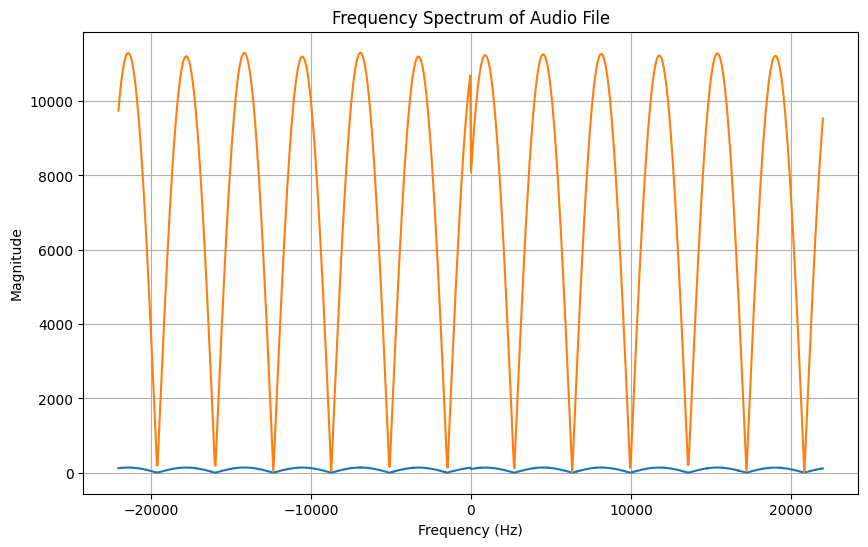

In [12]:
#plot the frequency spectrum
plt.figure(figsize=(10,6))
plt.plot(freq_values, magnitude)
plt.title("Frequency Spectrum of Audio File")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [13]:
from scipy.interpolate import interp1d

In [14]:
days = np.array([1,2,3,4,5,6,8,9,10])
temp_data = np.array([39,40,40,39,40,39,37,37,33])

#create interpolation function
inter_func = interp1d(days, temp_data, kind="linear")

#estimate temp on day 7
predict_date = 7
temp_day_7 = inter_func(predict_date)

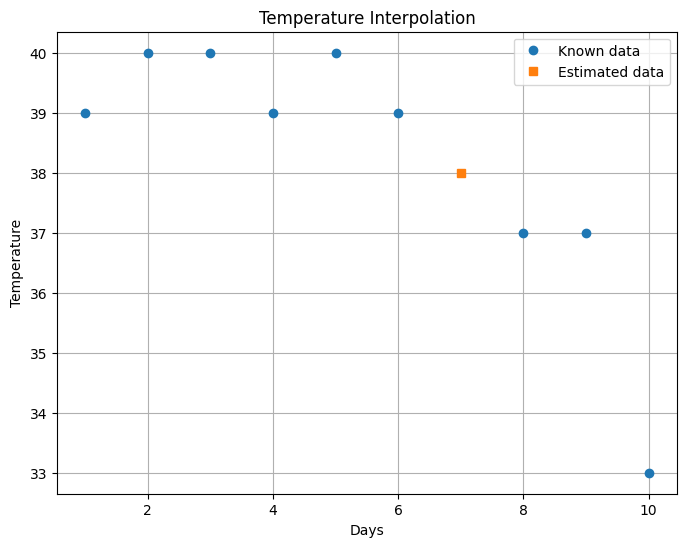

In [15]:
#plotting
plt.figure(figsize=(8,6))
plt.plot(days, temp_data, 'o', label="Known data")
plt.plot(predict_date, temp_day_7, 's', label="Estimated data")
plt.title("Temperature Interpolation")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()

The estimated temperature on day 7 is 38 °C.

In [16]:
from scipy.io import savemat
import datetime

sl_no = range(1,101)
temp = np.random.normal(0,1,100)

In [17]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)

    Draw random samples from a normal (Gaussian) distribution.

    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).

    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.

    .. note::
        New code should use the `~numpy.random.Generator.normal`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") o

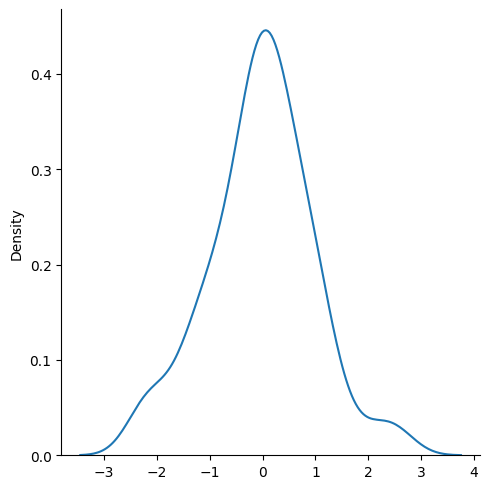

In [18]:
import seaborn as sns

sns.displot(temp, kind='kde')

In [19]:
data = {'sl_no':sl_no, 'temperature':temp}

savemat('data.mat', data)

In [20]:
from scipy.io import loadmat

#reading/loading the mat file
data = loadmat('data.mat')

print(data)

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Dec 15 11:15:27 2023', '__version__': '1.0', '__globals__': [], 'sl_no': array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]]), 'temperature': array([[ 8.14401850e-01, -5.96057808e-01, -1.02129887e+00,
        -5.42471281e-01, -6.29080710e-01,  2.40505250e+00,
        -1.01811171e+00,  4.80017026e-01, -5.49672732e-02,
         9.66608148e-01,  6.51339210e-01, -1.76339016e+00,
         5.07038547e-02, -1.19286937e-01, 